# MOVIE GENRE CLASSIFICATION

In [1]:
import pandas as pd

# train data
df1 = "Downloads/train_data.txt"
df= pd.read_csv(df1, sep=":::", names=['Title','Genre','Description'], engine='python')
train = pd.DataFrame(df)
print(train)

                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  
1       Listening in to a conversation between his do...  
2       A brother and sister with a past 

In [2]:
# test data

df1 = "Downloads/test_data.txt"
df= pd.read_csv(df1, sep=":::", names=['Title','Genre','Description'], engine='python')
test = pd.DataFrame(df)
print(test)

       Title                             Genre  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...                                          

In [3]:
print("TRAIN: \n", train.describe())
print("\n\nTEST: \n", test.describe())

TRAIN: 
                                  Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


TEST: 
               Title
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000


In [4]:
#checking null values

print("TRAIN: \n", train.isnull().sum())
print("\n\nTEST: \n", train.isnull().sum())

TRAIN: 
 Title          0
Genre          0
Description    0
dtype: int64


TEST: 
 Title          0
Genre          0
Description    0
dtype: int64


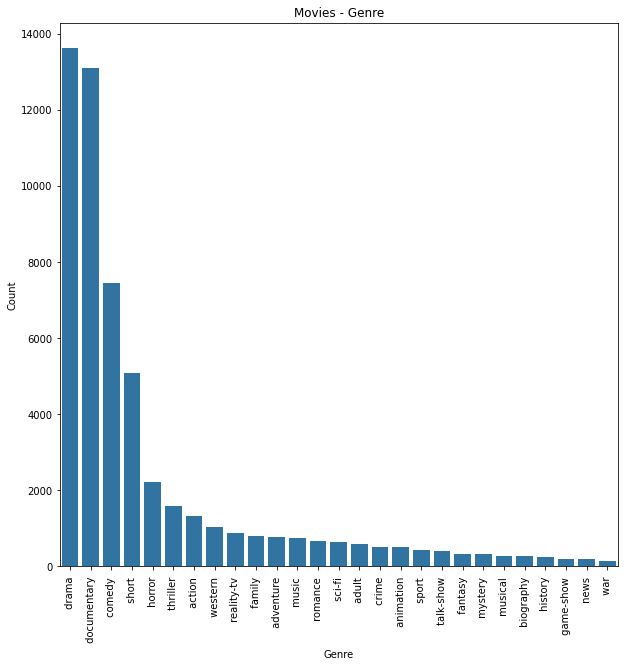

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.barplot(x=train['Genre'].value_counts().index, y=train['Genre'].value_counts())
plt.title('Movies - Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, cohen_kappa_score

def classify_report(ytest,y_pred):
    cr = classification_report(ytest,y_pred)
    accuracyscore = accuracy_score(ytest,y_pred)
    errorrate = 1-accuracyscore
    cohenkappascore = cohen_kappa_score(ytest,y_pred)
    
    print ("\nClassification Report:\n")
    print("\nAccuracy: ", accuracyscore)
    print("\nError Rate: ",errorrate )
    print("\nKappa Score: ", cohenkappascore)

In [34]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

train['Description'] = train['Description'].apply(preprocess_text)

vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df['Description'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Genre'])

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000, solver='saga')

# Train the model
lr.fit(xtrain, ytrain)

# Make predictions
ypred = lr.predict(xtest)

# Evaluate the model
print('\n\nCLASSIFICATION REPORT: \n\n', classification_report(ytest, ypred))
print('\n\n')
print(classify_report(ytest, ypred))

print("\n\nPREDICTED VALUES: ", label_encoder.inverse_transform(ypred[:5]))
print("\n\nACTUAL VALUES:", label_encoder.inverse_transform(ytest[:5]))



CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.36      0.17      0.23       263
           1       0.67      0.18      0.28       112
           2       0.37      0.08      0.13       139
           3       0.40      0.04      0.07       104
           4       0.00      0.00      0.00        61
           5       0.46      0.52      0.49      1443
           6       0.25      0.03      0.05       107
           7       0.66      0.84      0.74      2659
           8       0.53      0.75      0.62      2697
           9       0.42      0.09      0.14       150
          10       0.00      0.00      0.00        74
          11       0.86      0.30      0.44        40
          12       0.00      0.00      0.00        45
          13       0.53      0.50      0.51       431
          14       0.56      0.40      0.47       144
          15       0.33      0.02      0.04        50
          16       0.67      0.04      0.07        56


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,